# MNIST 데이터 설명
- https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset

# 이미지 픽셀화 및 CNN학습
- https://rdmkyg.blogspot.com/2021/06/cnn-cat-and-dog-dataset.html
- https://wikidocs.net/61073

In [1]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
import cv2
import glob
import torch

In [2]:
import transformers

In [3]:
# one-hot encoding: 60개

In [4]:
image_PATH_dir = 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\원천데이터'
label_PATH_dir = 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\라벨링 데이터'

In [5]:
image_data = glob.glob(image_PATH_dir+'\\*.png')
label_data = glob.glob(label_PATH_dir+'\\*.json')

In [6]:
print(image_data[1:5])
print(label_data[1:5])

['D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\원천데이터\\apple_fuji_L_1-11_1TOP.png', 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\원천데이터\\apple_fuji_L_1-12_2FR45.png', 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\원천데이터\\apple_fuji_L_1-13_3FR90.png', 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\원천데이터\\apple_fuji_L_1-14_4DI45.png']
['D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\라벨링 데이터\\apple_fuji_L_1-11_1TOP.json', 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\라벨링 데이터\\apple_fuji_L_1-12_2FR45.json', 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\라벨링 데이터\\apple_fuji_L_1-13_3FR90.json', 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\라벨링 데이터\\apple_fuji_L_1-14_4DI45.json']


# labelling

In [7]:
labelling = []

# a = image_data[0]
a = 'D:\\DOWNLOAD\\2020-02-068.농산물품질_sample\\라벨링 데이터\\chinese-cabbage_M_1-4_4DI45'
a = a.split('\\')[4]
print(a)

a = a.split('_')
print(a)

a = a[0] + '_' + a[1] 
print(a)

chinese-cabbage_M_1-4_4DI45
['chinese-cabbage', 'M', '1-4', '4DI45']
chinese-cabbage_M


In [8]:
labelling = []
for i in label_data:
    label = i
    label = label.split('\\')[4]
    label = label.split('_')
    if label[0] == 'chinese-cabbage':
        label = label[0] + '_' + label[1]
        labelling.append(label)
    else:
        label = label[0] + '_' + label[1] + '_' + label[2]
        labelling.append(label)

In [9]:
k = sorted(labelling)
print(len(k))
print(k[0:21])

2380
['apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L', 'apple_fuji_L']


In [10]:
l = sorted(set(labelling))
print(l)
print(len(l))

['apple_fuji_L', 'apple_fuji_M', 'apple_fuji_S', 'apple_yanggwang_L', 'apple_yanggwang_M', 'apple_yanggwang_S', 'cabbage_green_L', 'cabbage_green_M', 'cabbage_green_S', 'cabbage_red_L', 'cabbage_red_M', 'cabbage_red_S', 'chinese-cabbage_L', 'chinese-cabbage_M', 'chinese-cabbage_S', 'garlic_uiseong_L', 'garlic_uiseong_M', 'garlic_uiseong_S', 'mandarin_hallabong_L', 'mandarine_hallabong_M', 'mandarine_hallabong_S', 'mandarine_onjumilgam_L', 'mandarine_onjumilgam_M', 'mandarine_onjumilgam_S', 'onion_red_L', 'onion_red_M', 'onion_red_S', 'onion_white_L', 'onion_white_M', 'onion_white_S', 'pear_chuhwang_L', 'pear_chuhwang_M', 'pear_chuhwang_S', 'pear_singo_L', 'pear_singo_M', 'pear_singo_S', 'persimmon_bansi_L', 'persimmon_bansi_M', 'persimmon_bansi_S', 'persimmon_booyu_L', 'persimmon_booyu_M', 'persimmon_booyu_S', 'persimmon_daebong_L', 'persimmon_daebong_M', 'persimmon_daebong_S', 'potato_seolbong_L', 'potato_seolbong_M', 'potato_seolbong_S', 'potato_sumi_L', 'potato_sumi_M', 'potato_sumi

In [11]:
labelling = np.array(labelling)

In [12]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(labelling[0])

['apple', 'fuji', 'l']

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [14]:
# 레이블 인코딩
items = labelling
encoder = LabelEncoder()
encoder.fit(items)
labelling = encoder.transform(items)


# 원핫 인코딩
labels = encoder.inverse_transform(labelling)
labels = labels.reshape(-1,1)
o_h_encoder = OneHotEncoder()
o_h_encoder.fit(labels)
o_h_labels = o_h_encoder.transform(labels)

print(set(labelling))
print('원-핫 인코딩 데이터')
print(o_h_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(o_h_labels.shape)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}
원-핫 인코딩 데이터
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
원-핫 인코딩 데이터 차원
(2380, 54)


In [15]:
print(type(o_h_labels))

<class 'scipy.sparse.csr.csr_matrix'>


In [16]:
from scipy.sparse import csr_matrix
arr = o_h_labels.toarray()

In [36]:
print(arr.shape)
print(type(arr))

(2380, 54)
<class 'numpy.ndarray'>


# Transferring Image_to_Data

In [17]:
import PIL.Image as pilimg

In [18]:
image = []
for j in image_data:
    # Read image 

    image1 = Image.open(j)
    # plt.imshow(image1)
    # plt.show()
    imag1_size = image1.size
    # print(imag1_size)

    # Resize image
    image1 = image1.resize((int(imag1_size[0]*(0.064)), int(imag1_size[1]*(0.064))))
    imag1_size = image1.size
    # plt.imshow(image1)
    # plt.show()
    # print(imag1_size)
    # Fetch image pixel data to numpy array
    pix = np.array(image1)
    pix = pix / 255
#     pix = pix.flatten()

    image.append(pix)


In [19]:
image = np.array(image)

In [20]:
print(type(image))
print(image.shape) # 64 * 62 == 12288

<class 'numpy.ndarray'>
(2380, 64, 64, 3)


In [21]:
image = image.reshape(2380,12288)

In [22]:
print(type(image))
print(type(labelling))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Data Dividing

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image, arr, test_size = 1/7, random_state = 0)

In [24]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(2040, 12288)


In [25]:
print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(340, 12288)


In [26]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(2040, 54)


In [27]:
print(type(arr))

<class 'numpy.ndarray'>


# My Style

In [28]:
class Layer():
    def __init__(self,input_size,output_size):
        
        self.w = np. random.randn(input_size,output_size)
        self.b = np.zeros(output_size)
        self.dydw = None
        self.dydb = 1 
        
    def forward(self,X):
        self.dydw = X.T
        affine = np.dot(X,self.w) + self.b
        
        return affine
    
    def backward(self,dLdy,lr):
        dLdw = np.dot(self.dydw,dLdy)
        dLdb = np.sum(np.dot(dLdy, self.dydb),axis=0)
        
        dLdx = np.dot(dLdy,np.transpose(self.w))
       
        self.w -= lr * dLdw
        
        self.b -= lr * dLdb
        
        return dLdx
        

In [29]:
class Relu():
    def __init__(self):
        self.mask = None
        
    def forward(self,x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
#         print('dout',dout.shape)
#         print('mask',self.mask.shape)
        dout[self.mask]= 0
        #dout * np.where(self.mask==True,1,0)
        return dout * np.where(self.mask == True,1,0)

In [30]:
class Model():
    def __init__(self):
        self.layers = []
        #layer 설정
        self.layer = [12288]
        L = int(input('Number of Hidden_Layer: '))
        for i in range(L):
            d = int(input('Dimension:'))
            self.layer.append(d)    
        self.length = len(self.layer)
       
        for i in range(self.length-1):
            self.layers.append(Layer(self.layer[i],self.layer[i+1]))
            self.layers.append(Relu())
        self.layers.append(Layer(self.layer[-1],54))
    
    def forward(self,put):
        output = self.layers[0].forward(put)
        for i in range(1,len(self.layers)):            
            output = self.layers[i].forward(output)
        return output
    
    def backward(self, dld_, lr):
        for i in range(self.length-1,0,-1):
            dld_ = self.layers[i*2].backward(dld_, lr)
            dld_ = self.layers[i*2-1].backward(dld_)
        dld_ = self.layers[0].backward(dld_,lr)

        return dld_

In [31]:
class SoftmaxwithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def softmax(self,a):
        c = np.max(a,axis=-1,keepdims=True)
        exp_a = np.exp(a-c)
        sum_exp_a = np.sum(exp_a,axis=-1,keepdims=True)
        y = exp_a / sum_exp_a
        
        return y
    
    def cross_entropy_error(self,y,t):
        delta = 1e-13
        return -np.sum(t * np.log(y + delta)) / y.shape[0]
    
    def forward(self,x,t):
        self.t = t
        self.y = self.softmax(x)
        self.loss = self.cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

In [32]:
def accuracy(pred, target):
    pred = np.argmax(pred, axis=1)
    if target.ndim != 1 :
        target = np.argmax(target,axis=1)
        
    accuracy = np.sum(pred == target) / float(pred.shape[0])
    
    return accuracy

def learning(model,loss_func,X,y, minibatch_size, epoch_size, learning_rate):
    acc_list = []
    
    for e in range(1,epoch_size+1):
        
        combined = list(zip(X, y))
        permut = np.random.permutation(combined)
        X[:], y[:] = zip(*permut)
        
        number_minibatch = X.shape[0] // minibatch_size
                
        for n in range(1, number_minibatch + 1):

            X_temp = X[minibatch_size * (n-1):minibatch_size*n]
            y_temp = y[minibatch_size * (n-1):minibatch_size*n]
            
            c = model.forward(X_temp)
            J = loss_func.forward(c,y_temp)
        
            dJdh = loss_func.backward()
            model.backward(dJdh,learning_rate)

 
        c = model.forward(X)
        J = loss_func.forward(c,y)


        acc = accuracy(c, y)

        acc_list.append(acc)
        if e % iter_per_epoch == 0:
             print('*************',e,'th epoch *************')
    #             print('최종')
    #             print(J)
             print('정확도')
             print(acc)
        
    return acc_list

In [33]:
print(type(image))
print(type(o_h_labels))

<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
model2 = Model()
swl2 = SoftmaxwithLoss()

minibatch_size = 10
iter_per_epoch = 10


epoch_size = int(input('Epeoch_size:'))
train_result2 = learning(model2, swl2, X_train, y_train, minibatch_size, epoch_size, 0.0001)
test_result2 = learning(model2, swl2, X_test, y_test, minibatch_size, epoch_size, 0.0001)
layer2 = [np.max(train_result2),np.max(test_result2)]
# learning(model2, swl2, image, arr, minibatch_size, epoch_size, 0.0001)

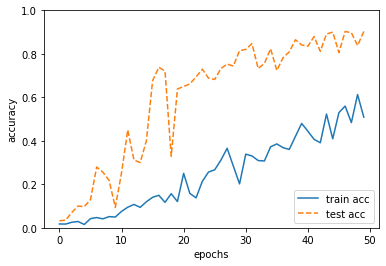

In [95]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(epoch_size)
plt.plot(x, train_result2, label='train acc')
plt.plot(x, test_result2, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [40]:
model3 = Model()
swl3 = SoftmaxwithLoss()

minibatch_size = 20
iter_per_epoch = 20


epoch_size = int(input('Epeoch_size:'))
train_result3 = learning(model3, swl3, image, arr, minibatch_size, epoch_size, 0.0001)
test_result3 = learning(model3, swl3, image, arr, minibatch_size, epoch_size, 0.0001)
layer3 = [np.max(train_result3),np.max(test_result3)]
# learning(model2, swl2, image, arr, minibatch_size, epoch_size, 0.0001)

Number of Hidden_Layer:  3
Dimension: 100
Dimension: 50
Dimension: 25
Epeoch_size: 40


C:\Users\LG\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


************* 20 th epoch *************
정확도
0.7974789915966387
************* 40 th epoch *************
정확도
1.0


KeyboardInterrupt: 

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(epoch_size)
plt.plot(x, train_result3, label='train acc')
plt.plot(x, test_result3, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()